![Backgroud Image](https://wallpapers.com/images/high/netflix-background-gs7hjuwvv2g0e9fj.webp)

We have a dataset that provides a snapshot of the Netflix userbase, containing 10 columns with the following meanings:

1. User ID: A unique identifier assigned to each user in the dataset.
2. Subscription Type: The subscription tier selected by the user (Basic, Standard, or Premium).
3. Monthly Revenue: The amount of revenue generated from the user’s subscription each month.
4. Join Date: The date when the user first subscribed to Netflix.
5. Last Payment Date: The most recent date the user made a payment for their subscription.
6. Country: The country where the user is located.
7. Age: The user's age.
8. Gender: The user's gender.
9. Device: The type of device the user primarily uses to access Netflix (e.g., Smart TV, Mobile, Desktop, Tablet).
10. Plan Duration: The length of the user's subscription plan (e.g., 1 month, 6 months, 12 months).

**Note:** This dataset is a synthetic representation and does not reflect actual Netflix user data. It can be utilized for analysis and modeling to explore user trends, preferences, and revenue generation within a hypothetical Netflix userbase.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv('C:/Users/LENOVO/Downloads/Netflix Userbase.csv')

In [123]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [124]:
df.shape

(2500, 10)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


### Get started with dataframe

In [126]:
# Convert columns to categorical columns
categorical_columns = ['User ID', 'Subscription Type', 'Country', 'Gender', 'Device', 'Plan Duration']
df[categorical_columns] = df[categorical_columns].astype('category')

# Convert columns to datetime columns with specified format
datetime_columns = ['Join Date', 'Last Payment Date']
df[datetime_columns] = df[datetime_columns].apply(lambda col: pd.to_datetime(col, format='%d-%m-%y')) 

# Added one columns 'Duration (days)' 
# reprsent the number of days from when the user joined until their most recent payment
df['Duration (days)'] = (df['Last Payment Date'] - df['Join Date']).dt.days

# Define age bins and labels
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-29', '30-39', '40-49', '50+']
# Added one columns 'Age Group' 
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate the 'Total Revenue' 
# generated per user by multiplying Monthly Revenue by the number of months (Duration / 30)
df['Total Revenue'] = df['Monthly Revenue'] * (df['Duration (days)'] / 30)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   category      
 1   Subscription Type  2500 non-null   category      
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   category      
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   category      
 8   Device             2500 non-null   category      
 9   Plan Duration      2500 non-null   category      
 10  Duration (days)    2500 non-null   int64         
 11  Age Group          2500 non-null   category      
 12  Total Revenue      2500 non-null   float64       
dtypes: category(7), datetime64[ns](2), float64(1), int64(3)
memory 

**Overview**

In [128]:
df.describe(include='all')

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days),Age Group,Total Revenue
count,2500.0,2500,2500.000000,2500,2500,2500,2500.000000,2500,2500,2500,2500.000000,2500,2500.000000
unique,2500.0,3,NaN,NaN,NaN,10,NaN,2,4,1,NaN,4,NaN
top,1.0,Basic,NaN,NaN,NaN,Spain,NaN,Female,Laptop,1 Month,NaN,30-39,NaN
freq,1.0,999,NaN,NaN,NaN,451,NaN,1257,636,2500,NaN,1007,NaN
mean,NaN,NaN,12.508400,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,NaN,38.795600,NaN,NaN,NaN,308.619200,NaN,128.669867
min,NaN,NaN,10.000000,2021-09-05 00:00:00,2023-06-10 00:00:00,NaN,26.000000,NaN,NaN,NaN,8.000000,NaN,2.666667
25%,NaN,NaN,11.000000,2022-07-15 00:00:00,2023-06-29 00:00:00,NaN,32.000000,NaN,NaN,NaN,261.000000,NaN,107.433333
50%,NaN,NaN,12.000000,2022-08-31 00:00:00,2023-07-03 00:00:00,NaN,39.000000,NaN,NaN,NaN,307.000000,NaN,125.033333
75%,NaN,NaN,14.000000,2022-10-17 00:00:00,2023-07-08 00:00:00,NaN,45.000000,NaN,NaN,NaN,356.000000,NaN,148.000000
max,NaN,NaN,15.000000,2023-06-14 00:00:00,2023-07-15 00:00:00,NaN,51.000000,NaN,NaN,NaN,655.000000,NaN,327.500000


Overall, we can see some basic information from the dataset:
- 2500 unique User IDs
- There are 3 types of subscriptions, with Basic being the most selected type
- Join Date ranges from [2021-09-05; 2023-06-14]
- Last Payment Date ranges from [2023-06-10; 2023-07-15]
- The dataset includes data from 10 different countries, with the largest user group being those aged 30 to 39.

Now, let's proceed with the analysis!

In [150]:
sns.set_theme(style="whitegrid", palette= 'Reds')

### Demographic Analysis

   - **Age Distribution**: Analyze the distribution of users across different age to understand which ages constitutes the largest portion of the user base
   - **Age Group Distribution**: Analyze the distribution of users across different age groups (e.g., 20-29, 30-39) to understand which age group constitutes the largest portion of the user base.
   - **Country-Wise User Analysis**: Understand the distribution of users across different countries and see which country has the most users.
   - **Gender Distribution**: Analyze the gender balance within the user base and how it might vary across different regions or age groups.

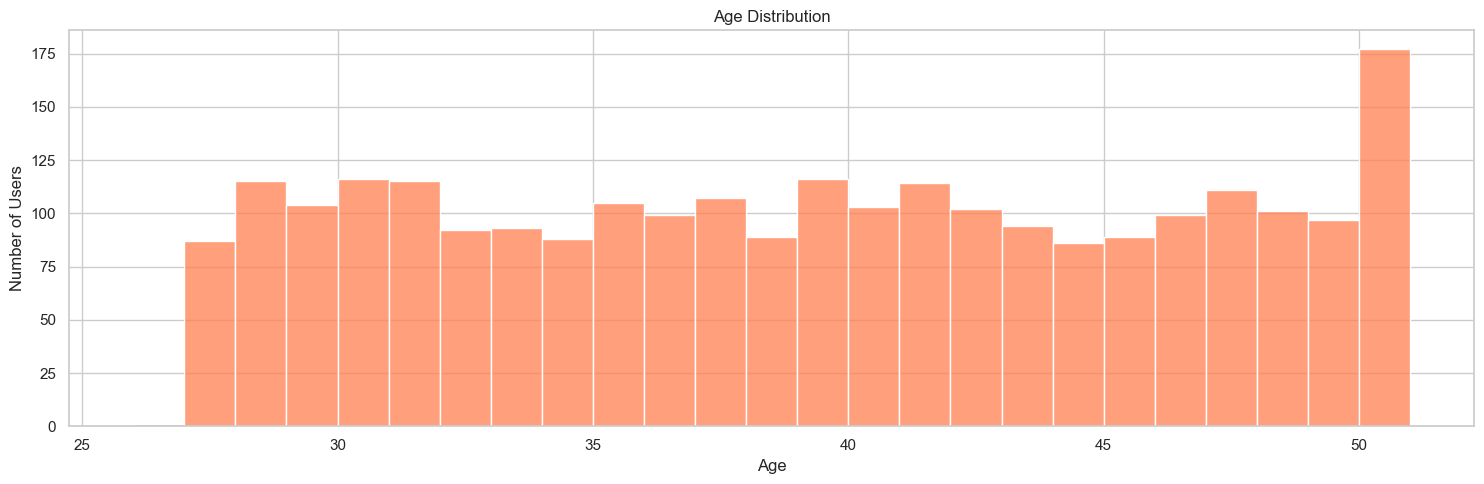

In [151]:
plt.figure(figsize=(15,5))

# Plot the age distribution
sns.histplot(data=df, x="Age", binwidth=1, color='coral')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

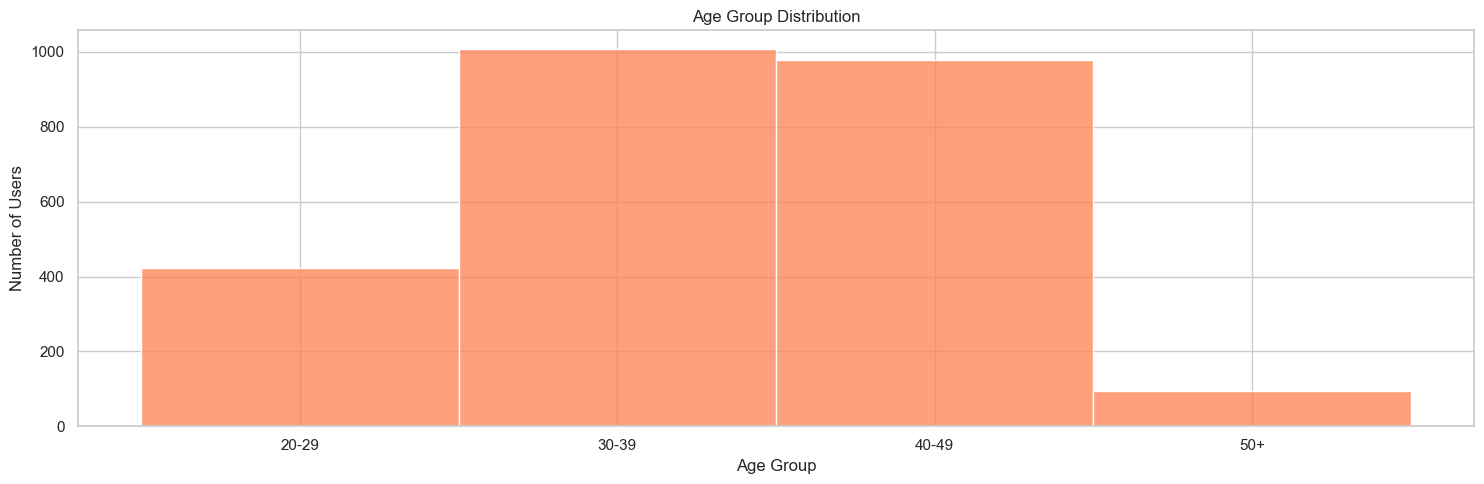

In [152]:
plt.figure(figsize=(15,5))

# Plot the age group distribution
sns.histplot(data=df, x="Age Group", binwidth=1, color='coral')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

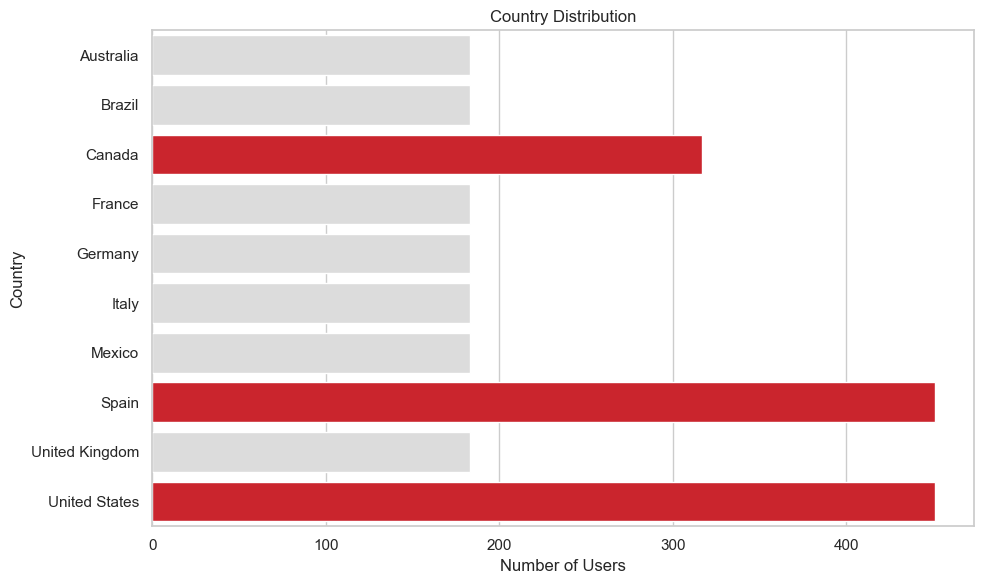

In [153]:
plt.figure(figsize=(10, 6))
frequency_counts = df['Country'].value_counts()
color_map = {country: '#E50914' if freq > 200 else '#DCDCDC' for country, freq in frequency_counts.items()}

# Plot the country distribution using countplot
sns.countplot(data=df, y="Country", palette=color_map)
plt.title('Country Distribution')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

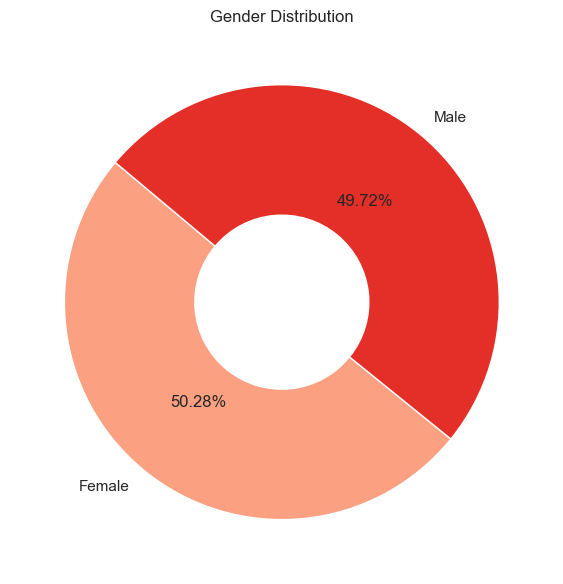

In [154]:
fig, ax = plt.subplots(figsize=(10, 6)) 

# Plot the gender distribution
gender_counts = df['Gender'].value_counts()
colors = sns.color_palette("Reds", n_colors=len(gender_counts))

ax.pie(gender_counts, labels=gender_counts.index, startangle=140, 
       wedgeprops=dict(width=0.6), autopct='%1.2f%%', colors=colors)
ax.set_title('Gender Distribution')

# Display the plot
plt.tight_layout()
plt.show()

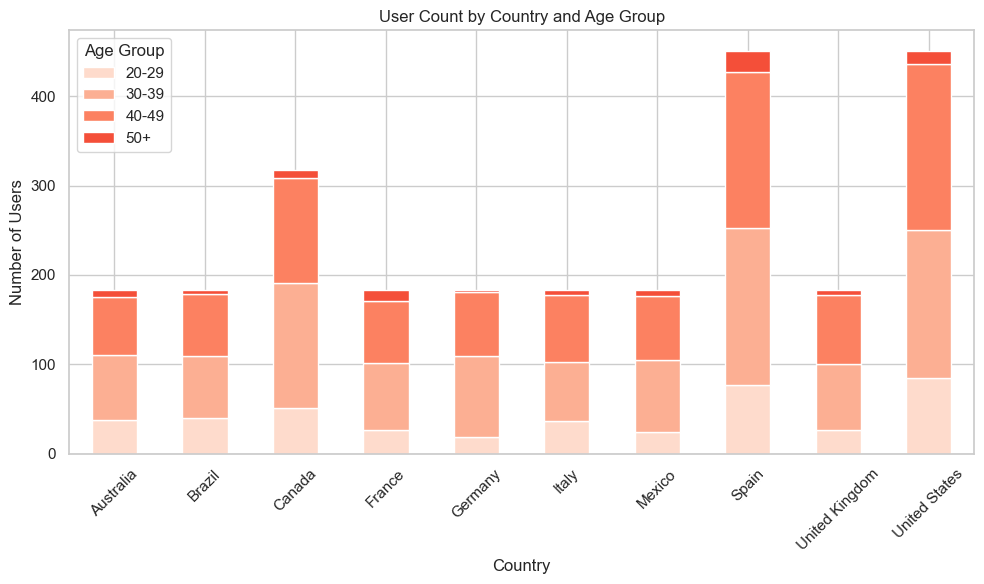

In [155]:
# Group data by Country and Age Group, count the User IDs
age_group_counts = df.groupby(['Country', 'Age Group'])['User ID'].count().unstack()

# Plot the stacked bar chart
ax = age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Reds"))
plt.title('User Count by Country and Age Group')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

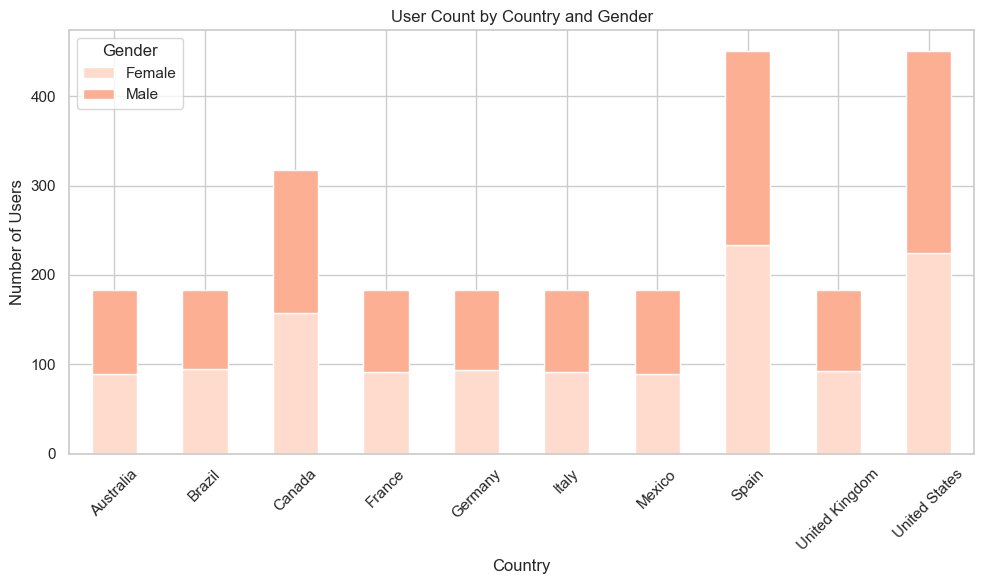

In [156]:
# Group data by Country and Age Group, count the User IDs
Gender_group_counts = df.groupby(['Country', 'Gender'])['User ID'].count().unstack()

# Plot the stacked bar chart
ax = Gender_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Reds"))
plt.title('User Count by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Users behaviour Analysis

   - **Subscription Preferences**: Examine the subscription types and see if there's any correlation between user demographics (e.g., age, country) and their preferred subscription type.
   - **Device Usage**: Analyze which devices (e.g., mobile, desktop) are most commonly used by different demographic groups and how that might affect the user experience.
   - **Join Date Trend**: Analyze the trend of new user signups over time to understand when the platform sees a peak in new users.

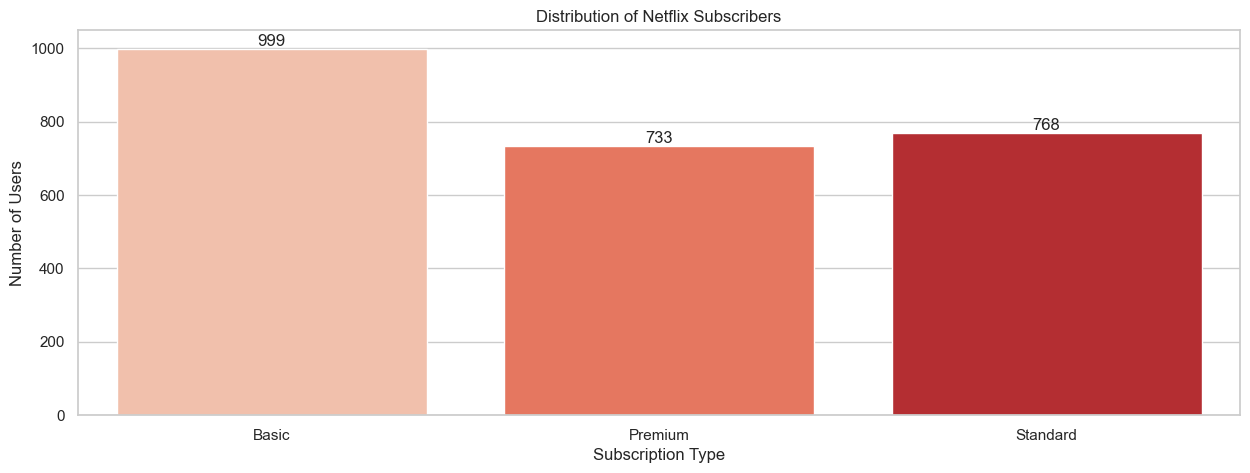

In [166]:
plt.figure(figsize=(15,5))

# Plot the distribution of subscription types
ax = sns.countplot(data=df, x='Subscription Type', palette='Reds')
plt.title('Distribution of Netflix Subscribers')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')

for i in ax.containers:    
    ax.bar_label(i,)

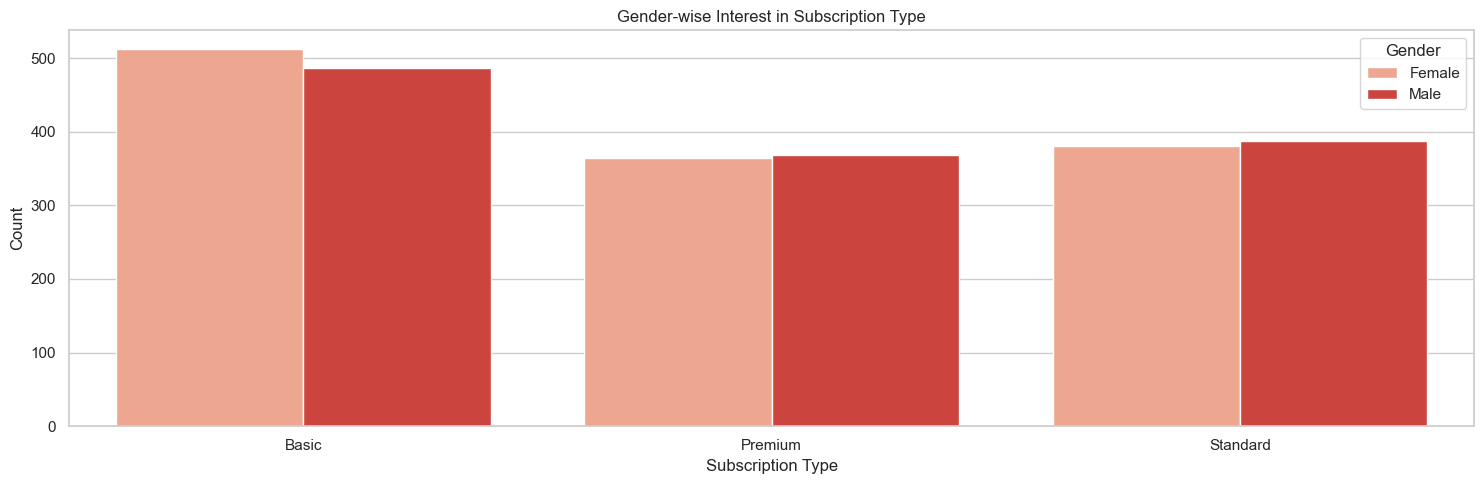

In [158]:
plt.figure(figsize=(15,5))

# Plot gender-wise interest of subscription type
sns.countplot(x="Subscription Type", hue="Gender", data=df, palette='Reds')
plt.title('Gender-wise Interest in Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()  
plt.show()

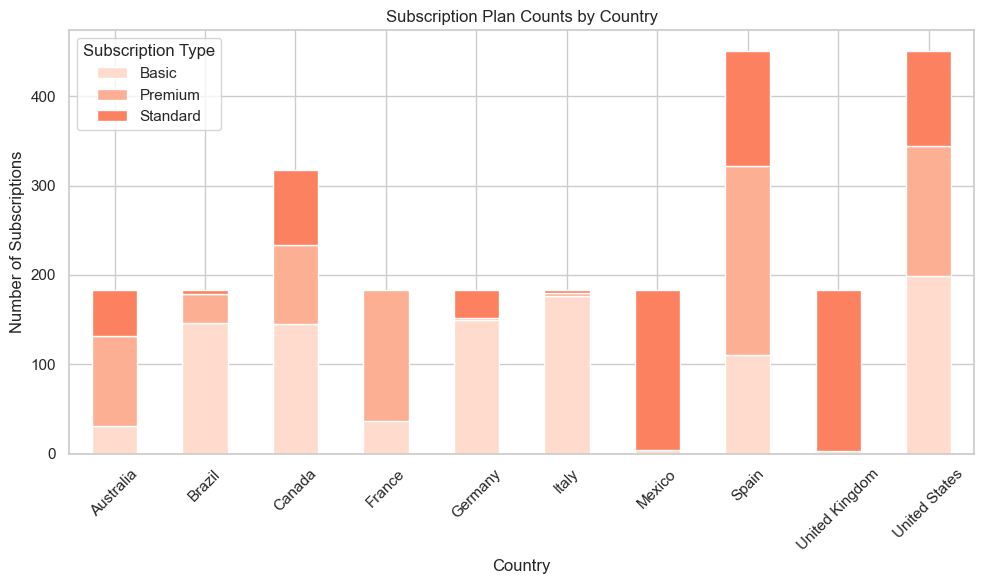

In [138]:
# Country Distribution by Subscription Type
subscription_counts = df.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()

# Plot the stacked bar chart
ax = subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Reds"))
plt.title('Subscription Plan Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()

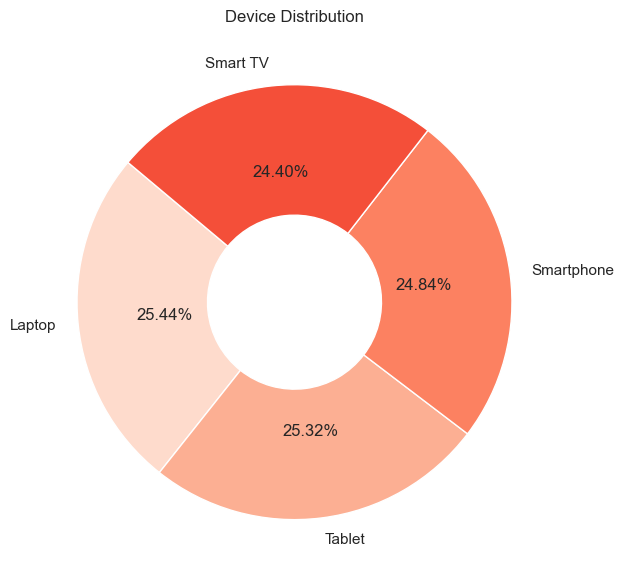

In [159]:
fig, ax = plt.subplots(figsize=(10, 6)) 

# Plot the devices distribution
device_counts = df['Device'].value_counts()
ax.pie(device_counts, labels=device_counts.index, startangle=140, 
       wedgeprops=dict(width=0.6), autopct='%1.2f%%')
ax.set_title('Device Distribution')
plt.tight_layout()
plt.show()

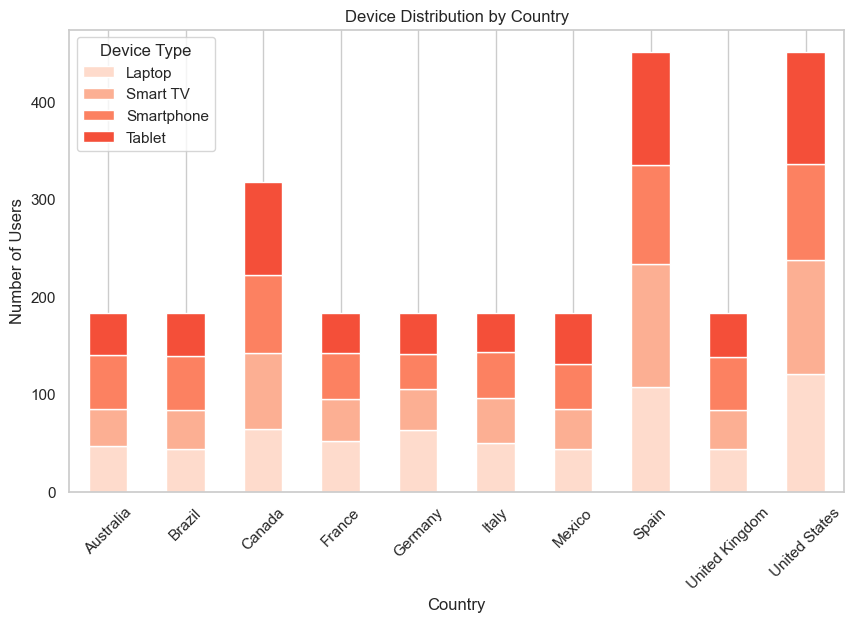

In [160]:
# Device Distribution by Age Groups
device_by_country = df.groupby(['Country', 'Device']).size().unstack()

# Plot the stacked bar chart
device_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Reds"))
plt.title('Device Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Device Type')
plt.show()

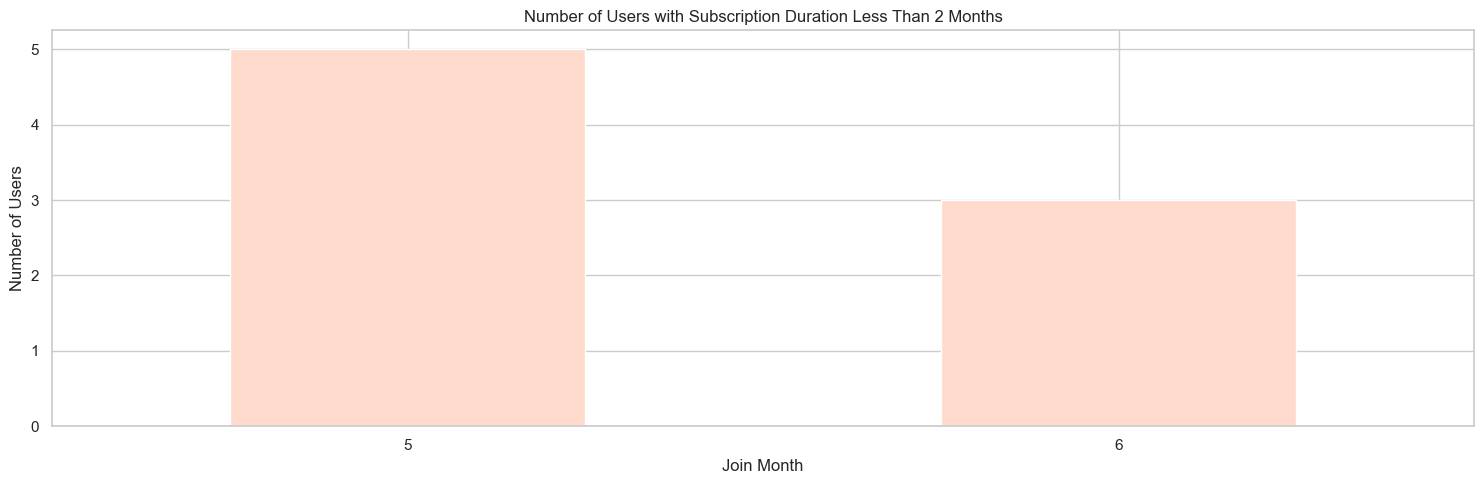

In [162]:
# Filter users whose subscription duration is less than 60 days
users_less_than_2_months = df[df['Duration (days)'] < 60]

# Extract the month from the 'Join Date' for these users
users_less_than_2_months['Join Month'] = users_less_than_2_months['Join Date'].dt.month

# Count the number of users for each month
users_by_month = users_less_than_2_months['Join Month'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(15,5))
users_by_month.plot(kind='bar')
plt.title('Number of Users with Subscription Duration Less Than 2 Months')
plt.xlabel('Join Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

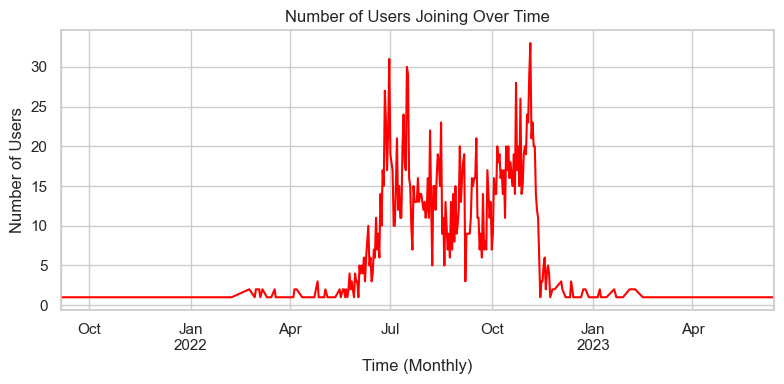

In [164]:
# Group by 'Join Date' to calculate the number of users joining each date
users_over_time = df.groupby(df['Join Date'].dt.to_period('D'))['User ID'].count()

# Plot the line plot for Number of Users Joining Over Time
plt.figure(figsize=(8, 4))
users_over_time.plot(kind='line', color='Red', label='Users Joining Over Time')
plt.title('Number of Users Joining Over Time')
plt.xlabel('Time (Monthly)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

### Revenue Analysis

   - **Revenue per Age Group**: Calculate the total or average revenue generated by each age group to identify high-value user segments.
   - **Country-wise Revenue**: Analyze total and average revenue per country to understand which regions are generating the most revenue.

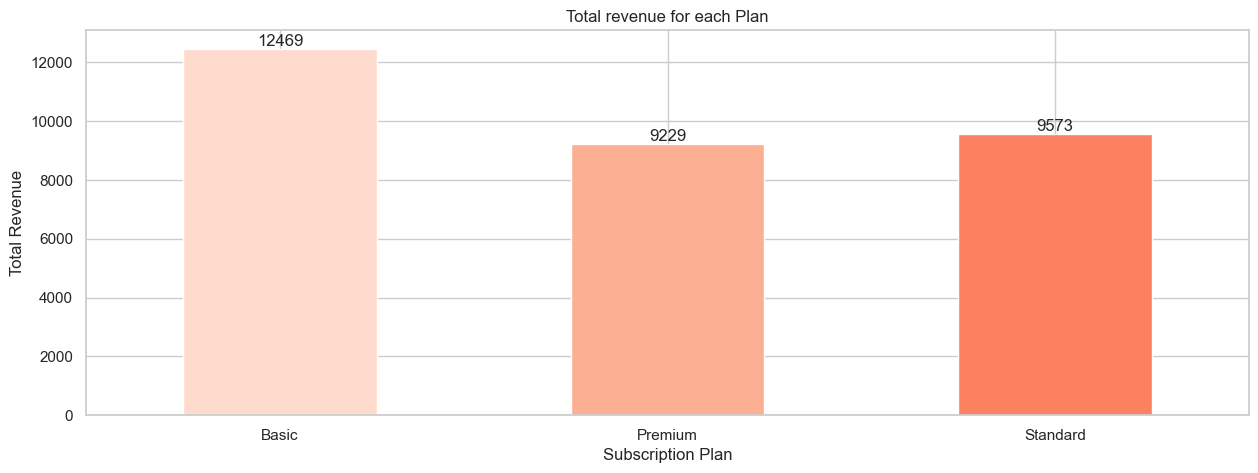

In [143]:
plt.figure(figsize=(15,5))

# Group the data by 'Subscription Type' and sum the 'Monthly Revenue', then plot it as a bar chart
ax = df.groupby('Subscription Type')['Monthly Revenue'].agg('sum').plot(kind='bar', color=sns.color_palette("Reds"))
plt.xticks(rotation=0)
plt.title('Total revenue for each Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Total Revenue')

for i in ax.containers:
    ax.bar_label(i,)

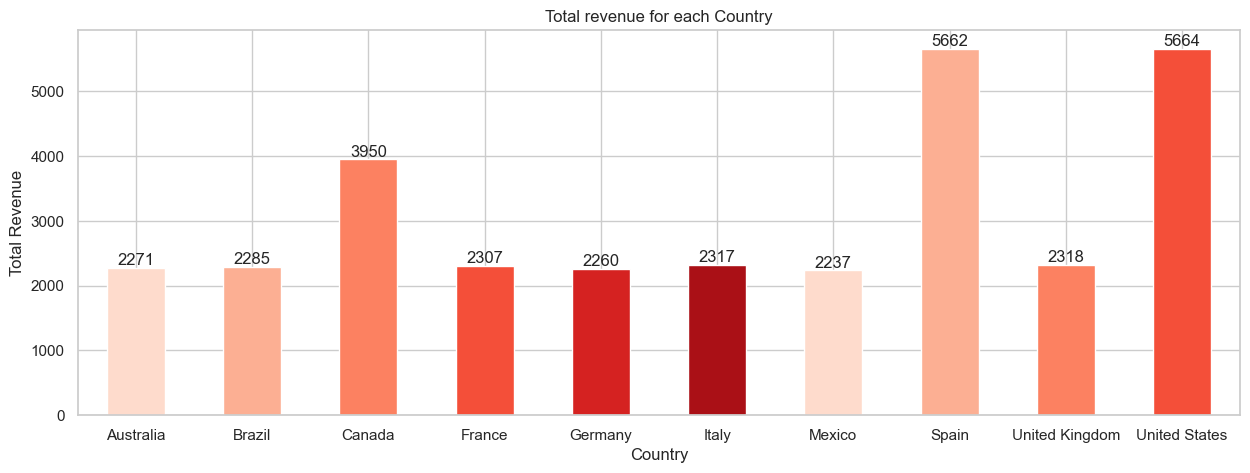

In [144]:
plt.figure(figsize=(15,5))

# Group the data by 'Country' and sum the 'Monthly Revenue', then plot it as a bar chart
ax = df.groupby('Country')['Monthly Revenue'].agg('sum').plot(kind='bar', color=sns.color_palette("Reds"))
plt.xticks(rotation=0)
plt.title('Total revenue for each Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')

for i in ax.containers:
    ax.bar_label(i,)

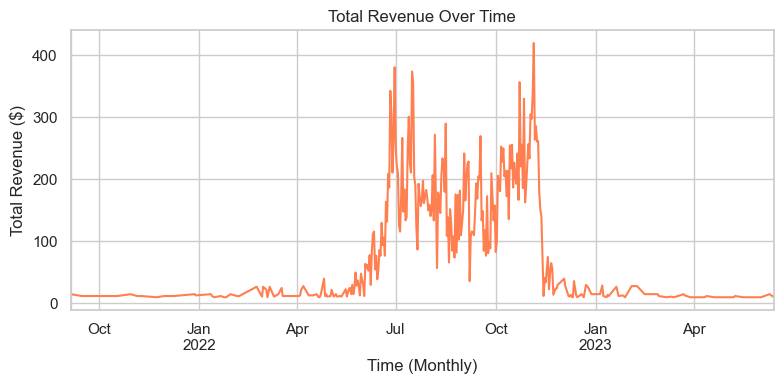

In [165]:
# Calculate the total revenue generated over time (assuming Monthly Revenue represents the revenue per user)
revenue_over_time = df.groupby(df['Join Date'].dt.to_period('D'))['Monthly Revenue'].sum()

# Plot the line plot for Total Revenue Over Time
plt.figure(figsize=(8, 4))
revenue_over_time.plot(kind='line', color='Coral', label='Total Revenue Over Time')
plt.title('Total Revenue Over Time')
plt.xlabel('Time (Monthly)')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

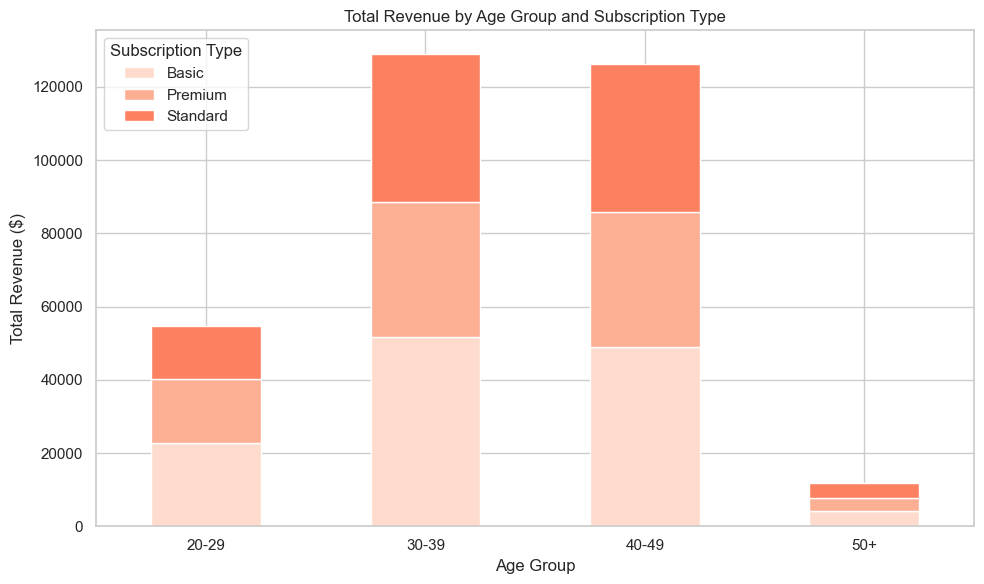

In [146]:
# Group by 'Age Group' and 'Subscription Type', and calculate the total revenue
total_revenue_by_age_group = df.groupby(['Age Group', 'Subscription Type'])['Total Revenue'].sum().unstack()

# Plot the stacked bar chart
total_revenue_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Reds"))
plt.title('Total Revenue by Age Group and Subscription Type')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.legend(title='Subscription Type', loc='upper left')
plt.tight_layout()
plt.show()

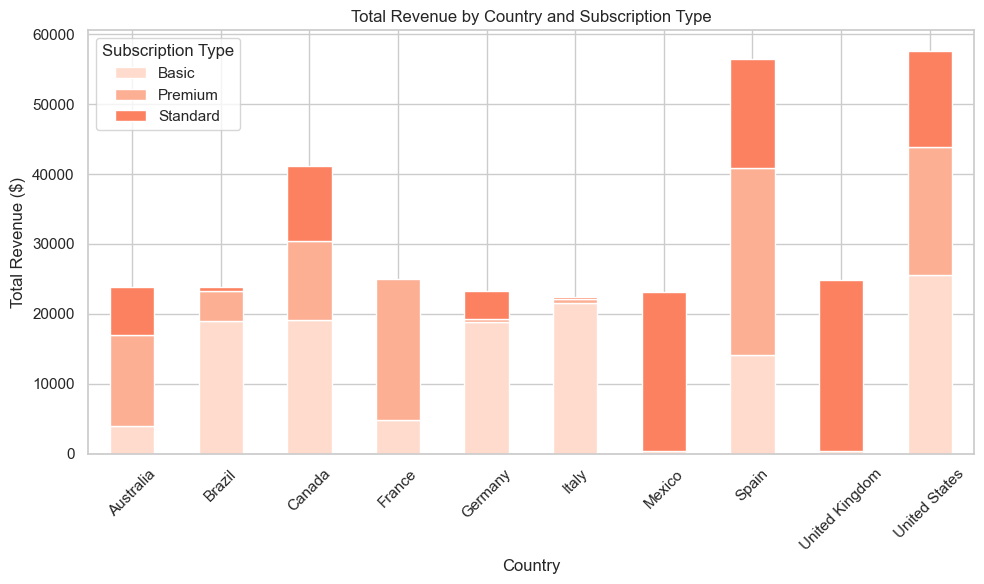

In [147]:
# Group by 'Country' and 'Subscription Type', and calculate the total revenue
total_revenue_by_country = df.groupby(['Country', 'Subscription Type'])['Total Revenue'].sum().unstack()

# Plot the stacked bar chart
total_revenue_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Reds"))
plt.title('Total Revenue by Country and Subscription Type')
plt.xlabel('Country')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()

### Plan Duration Analysis

   - **Plan Duration vs Revenue**: Investigate how the duration of the subscription plan affects total revenue, and if longer subscriptions lead to higher total revenue.

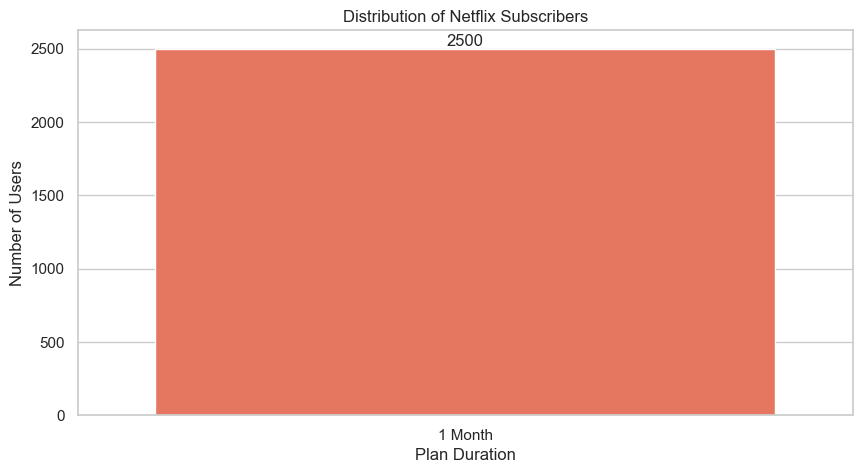

In [148]:
plt.figure(figsize=(10,5))

# Plot the distribution of Plan Duration
ax = sns.countplot(data=df, x='Plan Duration', palette='Reds')
plt.title('Distribution of Netflix Subscribers')
plt.xlabel('Plan Duration')
plt.ylabel('Number of Users')

for i in ax.containers:    
    ax.bar_label(i,)

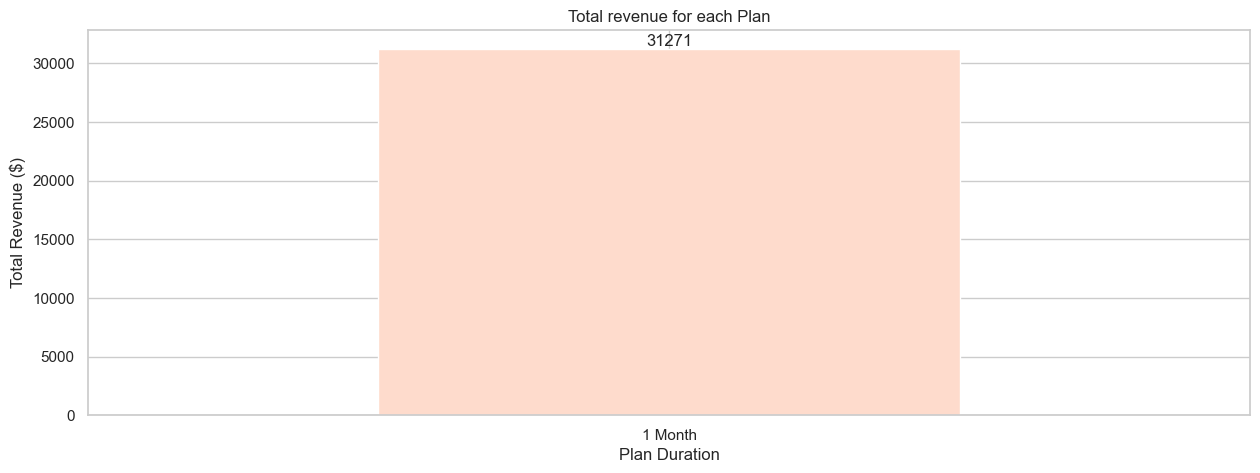

In [149]:
plt.figure(figsize=(15,5))

# Group the data by 'Plan Duration' and sum the 'Monthly Revenue', then plot it as a bar chart
ax = df.groupby('Plan Duration')['Monthly Revenue'].agg('sum').plot(kind='bar', color=sns.color_palette("Reds"))
plt.xticks(rotation=0)
plt.title('Total revenue for each Plan')
plt.xlabel('Plan Duration')
plt.ylabel('Total Revenue ($)')

for i in ax.containers:
    ax.bar_label(i,)